# Linear Regression
## Automotive Pricing Model
#####  By: Sanath P Kanchan

### Problem Statement

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-  Which variables are significant in predicting the price of a car
-  How well those variables describe the price of a car
<br>Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 

 Let's Begin by importing all the required library packages !!

In [35]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing packages for linear regression 

In [37]:
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feature scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Reading the data

In [38]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
car_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

Inspect the various aspects of the car dataframe

In [40]:
car_data.shape

(205, 26)

In [41]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
car_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [43]:
# percentage of missing values in each column
round(car_data.isnull().sum()/len(car_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [44]:
# Dropping Duplicates if any
car_data=car_data.drop_duplicates()

In [11]:
#we can drop the car_ID variable which is not relevent for the price modeling
car_data.drop('car_ID',axis=1,inplace=True)

In [45]:
car_data['CarName'] = car_data['CarName'].str.split(' ', expand = True)[0]
car_data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [46]:
# Since the car names are duplicated with erroneous spellings, correct the cpellings and replace the values.
# Also noticed that the Car Alfa Romeo, though appears once is wrongly spelt as Alfa Romero. Hence this should also be corrected

# Replace alfa-romero to alfa-romeo as the car name is missplet in the data.
# Replace maxda as mazda
# Replace Nissan and nissan
# Replace porcshce as porsche
# Replace toyouta as toyota
# Replace vokswagen, vw as volkswagen

car_data.CarName = car_data.CarName.replace({'alfa-romero':'alfaromeo',
                                                   'maxda': 'mazda',
                                                   'Nissan': 'nissan',
                                                   'porcshce':'porsche',
                                                   'toyouta': 'toyota',
                                                   'vokswagen': 'volkswagen',
                                                   'vw': 'volkswagen'                                                
                                                  })
car_data.CarName.unique()

array(['alfaromeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [47]:
# change CarName column to carname to maintain uniformity in the column names

car_data = car_data.rename(columns = {"CarName": "carname"}) 

Remove outliers from price column as the difference between the mean and max value seems to be high.

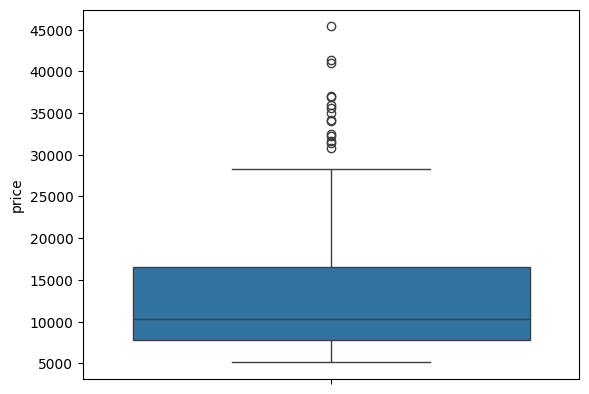

In [48]:
# Check the outliers in price column

sns.boxplot(y = 'price', data = car_data)
plt.show()

In [49]:
# Removing values beyond 99% in price column

nn_quartile = car_data['price'].quantile(0.99)
car_data = car_data[car_data["price"] < nn_quartile]
car_data["price"].describe()  

count      202.000000
mean     12841.834985
std       7192.112132
min       5118.000000
25%       7778.250000
50%      10221.500000
75%      16482.500000
max      37028.000000
Name: price, dtype: float64

In [50]:
car_data.shape

(202, 26)

dtype('O')

## Data Analysis

### Data Understanding and Correction

Visualising the Data

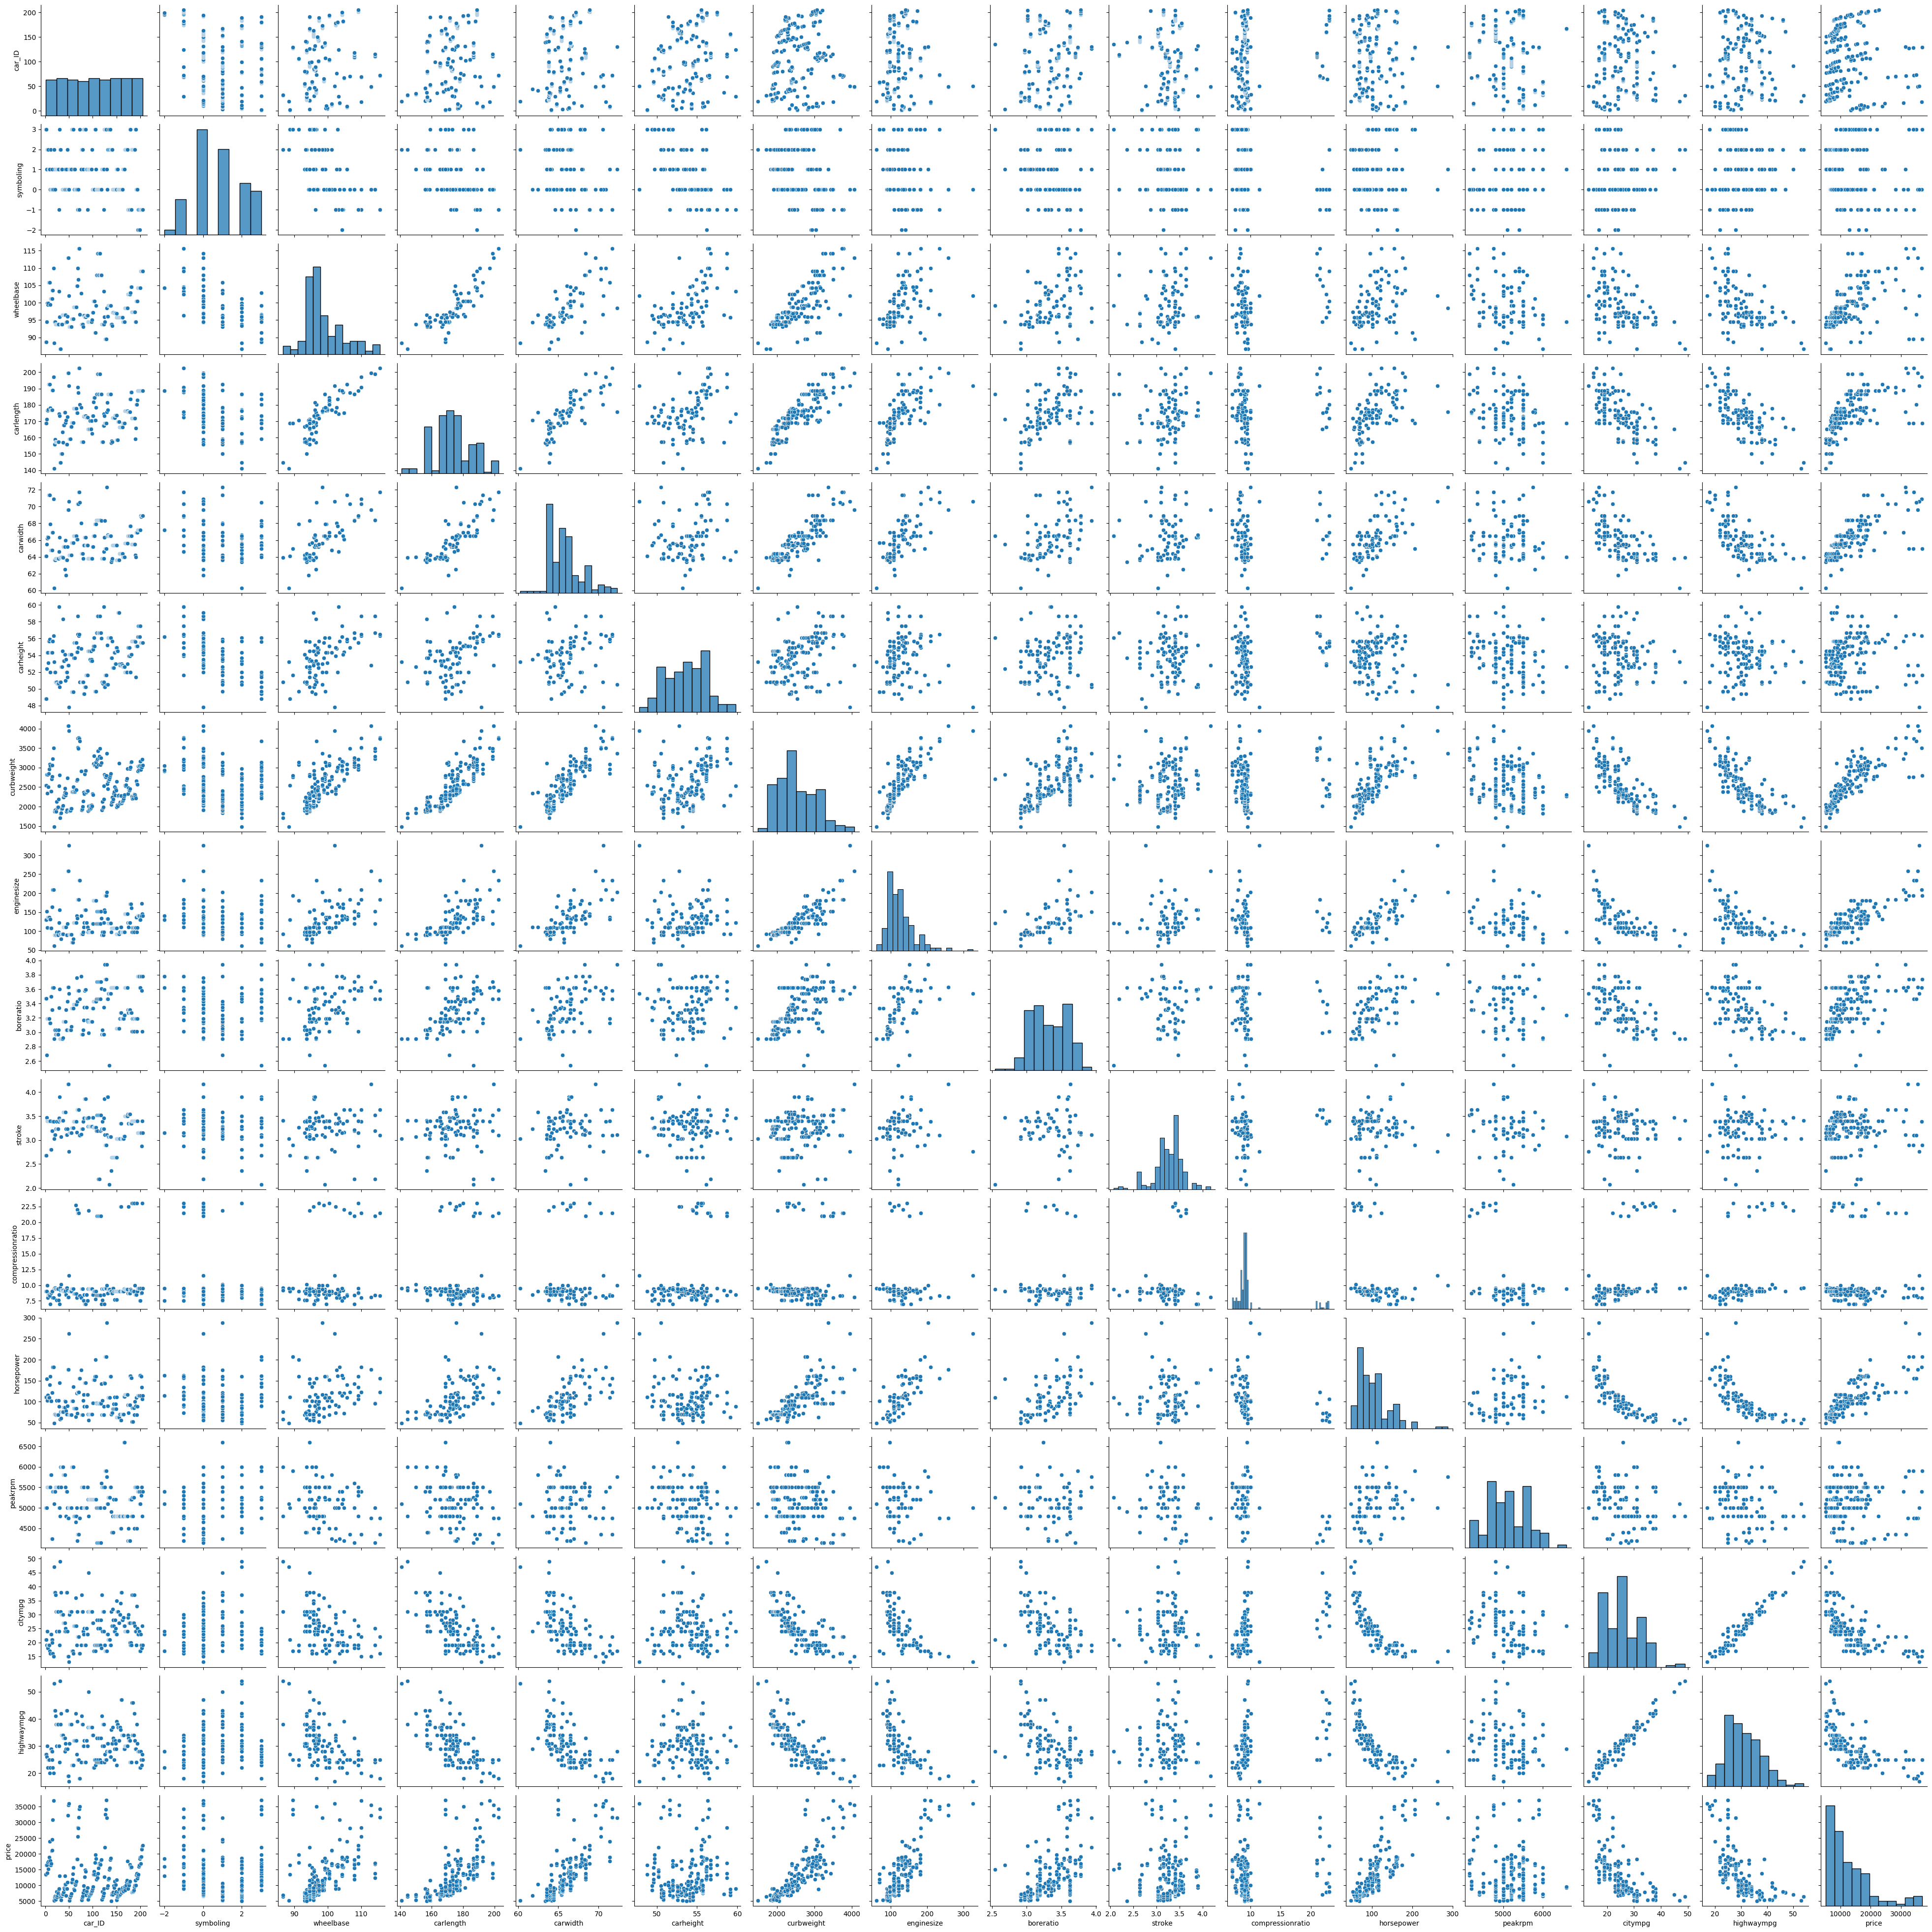

In [51]:
sns.pairplot(car_data)
plt.show()

There is a high correlation (more than 80%) between - carlength and wheelbase -> 0.87 - carlength and curbweight -> 0.87 - carwidth and carlength -> 0.83 - carwidth and curbweight -> 0.86 - curbweight and enginesize -> 0.85 - horsepower and eninesize -> 0.81 - highwaympg and citympg -> 0.97

Hence the following variables can be safely removed : - carlength, carwidth, enginesize, wheelbase, and highwaympg

<Figure size 1000x500 with 0 Axes>

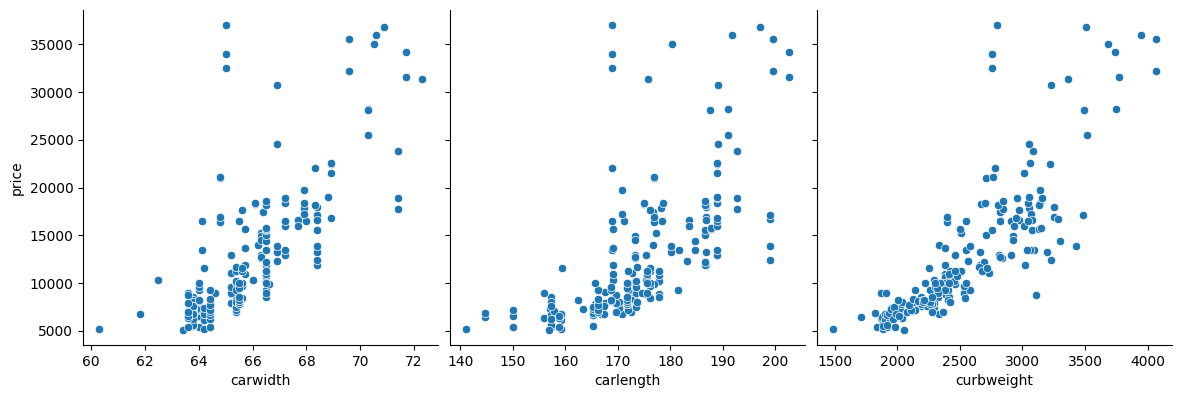

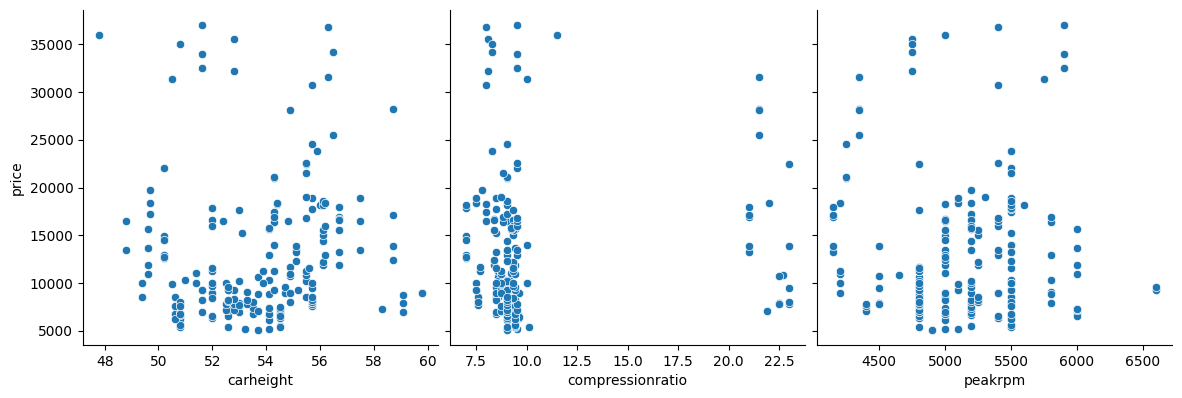

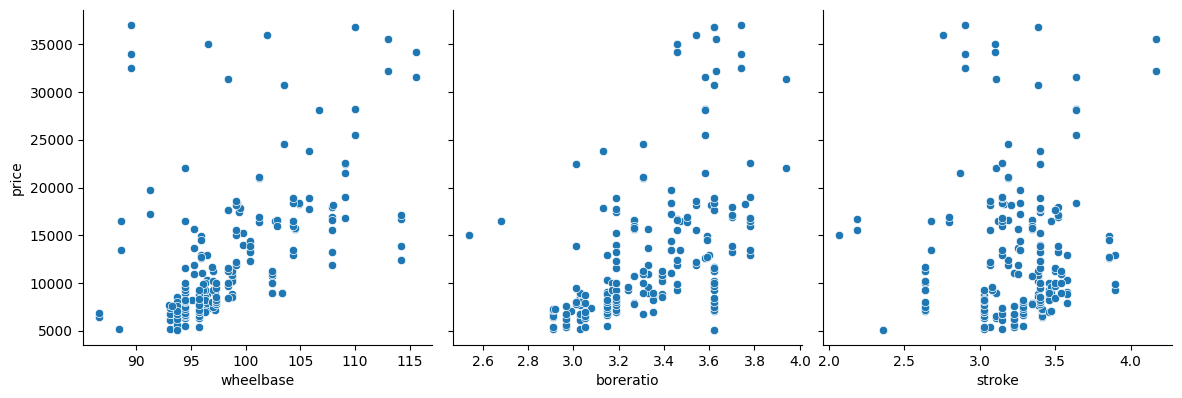

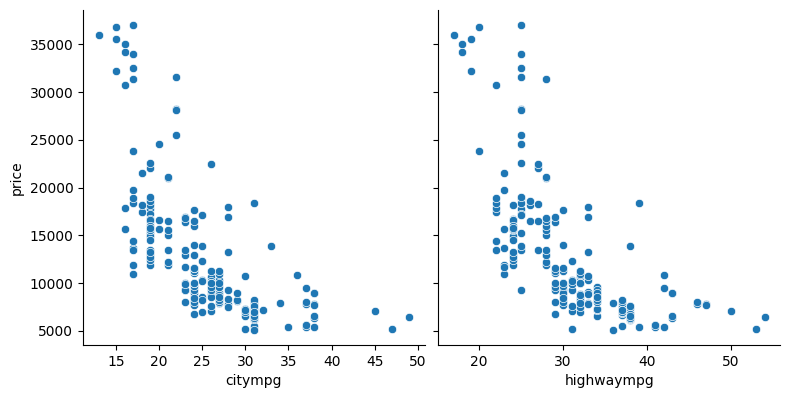

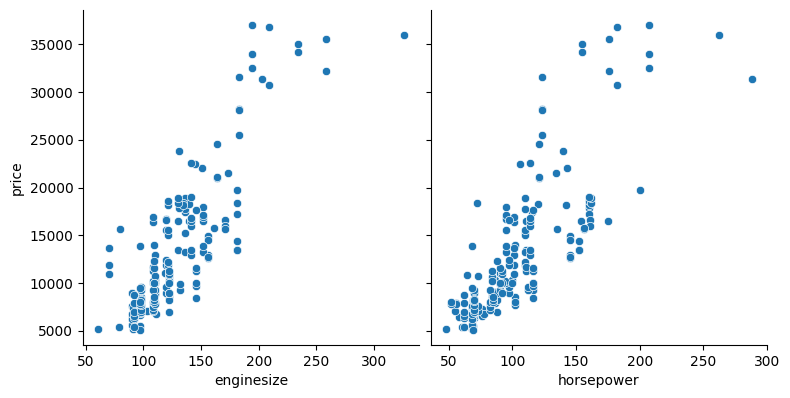

In [52]:
# Making pairplot for all numeric values that we need

plt.figure(figsize=(10,5))
sns.pairplot(car_data, x_vars=['carwidth','carlength','curbweight'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(car_data, x_vars=['carheight', 'compressionratio','peakrpm'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(car_data, x_vars=['wheelbase', 'boreratio','stroke'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(car_data, x_vars=['citympg','highwaympg'], y_vars='price',height=4, aspect=1,kind='scatter')
sns.pairplot(car_data, x_vars=['enginesize','horsepower'], y_vars='price',height=4, aspect=1,kind='scatter')
plt.show()

Observations : - carlength, carwidth, curbweight, enginesize and boreratio seems to be showing correlation towards right - citympg and highway mpg also seem to be showing some correlation towards left - Rest of the variables are too scattered and hence can be understood during firther analysis

## Visualize Categorical Data

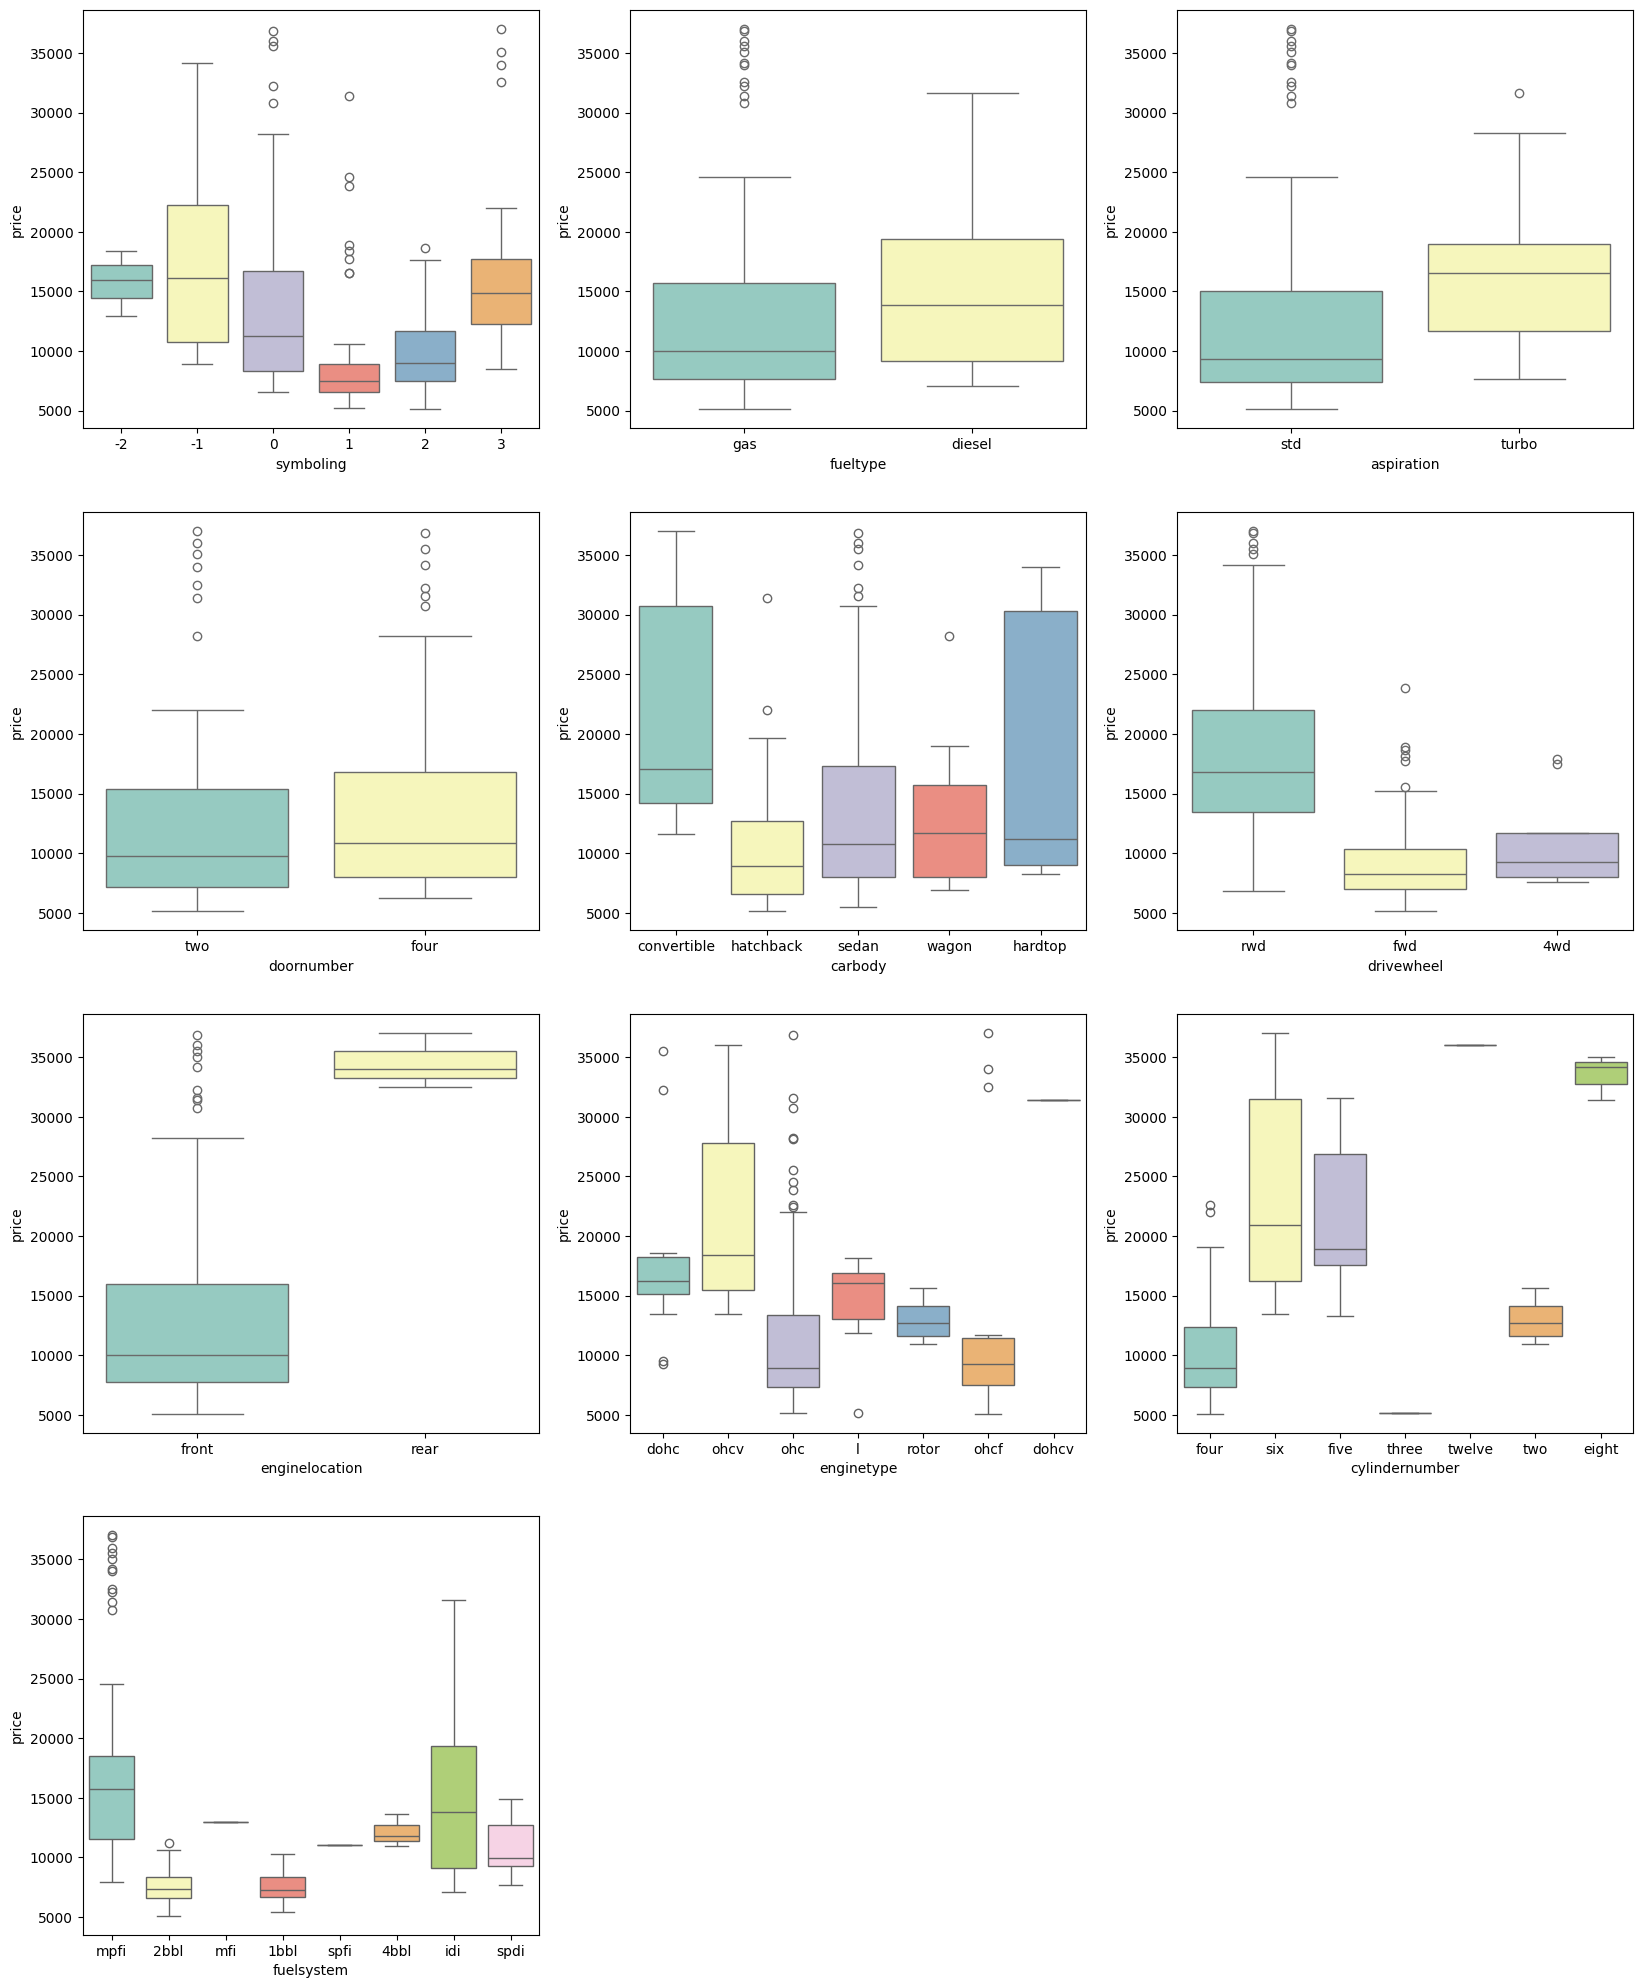

In [53]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', palette='Set3', data = car_data)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', palette= 'Set3', data = car_data)
plt.show()

Step 4: Data Preparation

In [74]:
#Removing the highly correlated variables

car_data.drop(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'highwaympg'], axis = 1, inplace = True)

<Figure size 2000x1000 with 0 Axes>

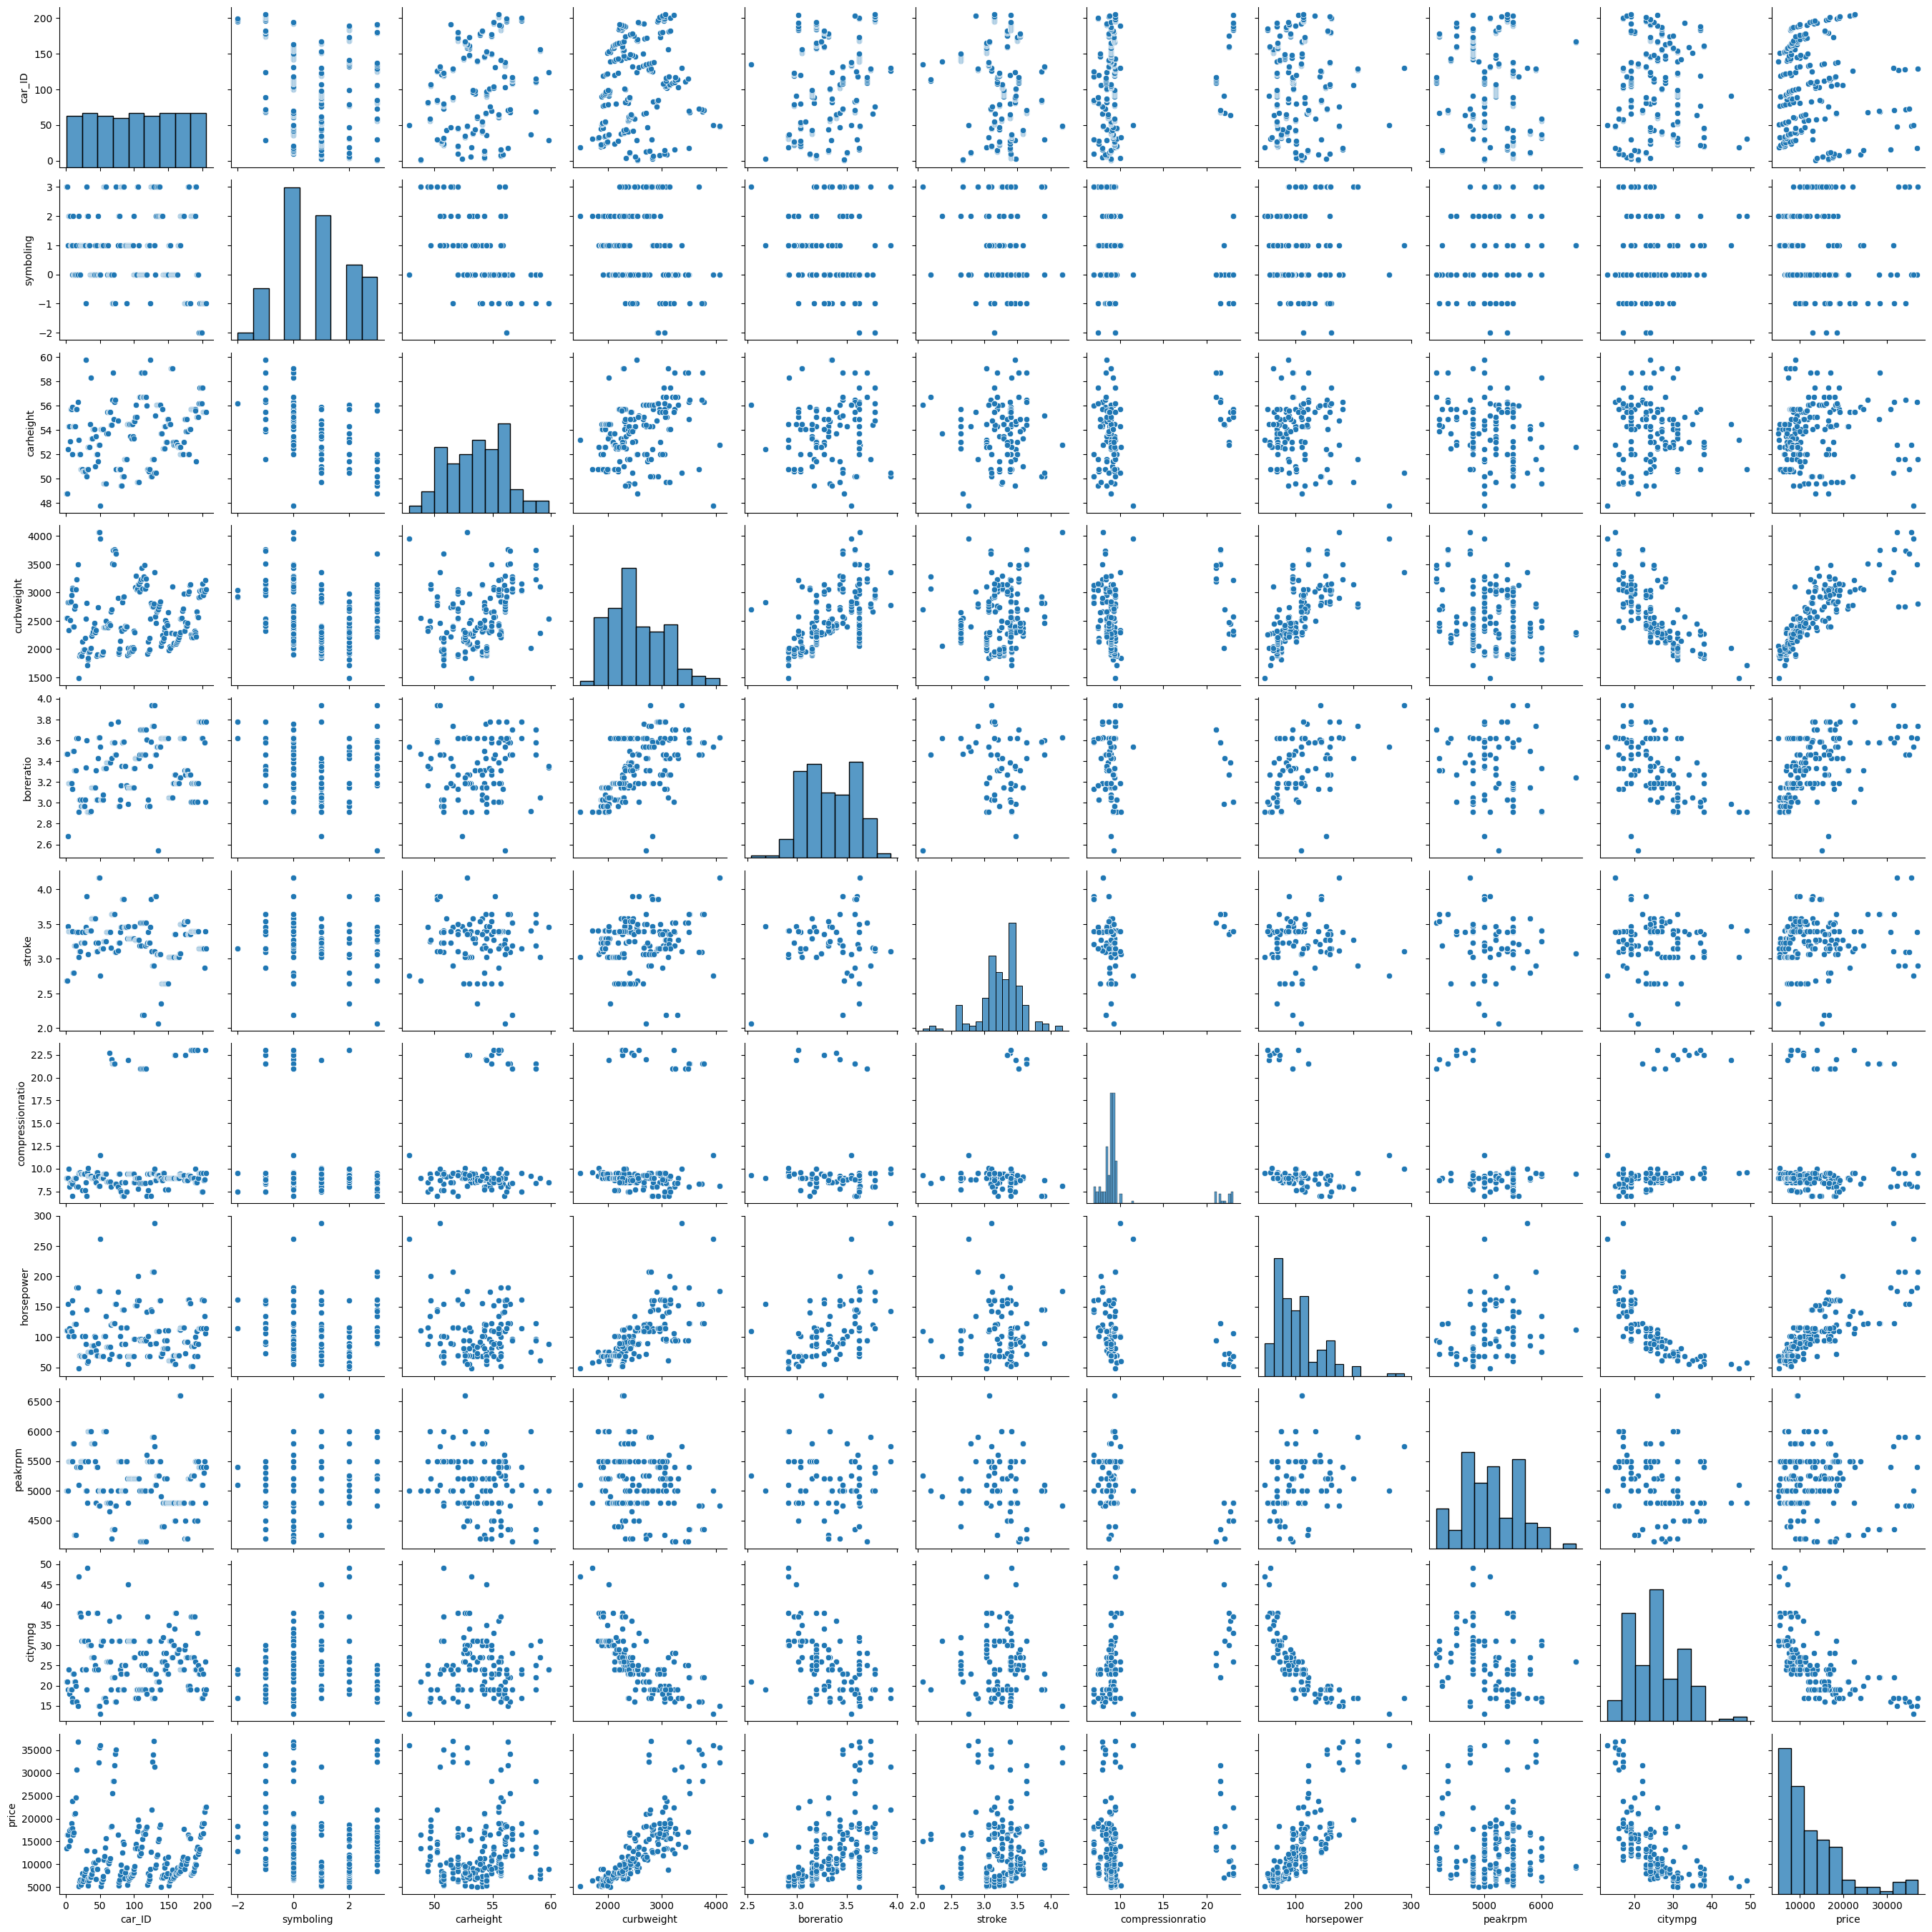

In [77]:
# check correlation after dropping columns

plt.figure(figsize = (20, 10))
sns.pairplot(car_data)
plt.show()

In [78]:
# Since the below fields contains only 2 values, creating values of binary type instead of dummy variables.

car_data['d_fueltype'] = car_data['fueltype'].map({'diesel':0, 'gas':1})
car_data['d_aspiration'] = car_data['aspiration'].map({'turbo':0, 'std':1})
car_data['d_doornumber'] = car_data['doornumber'].map({'four':0, 'two':1})
car_data['d_enginelocation'] = car_data['enginelocation'].map({'rear':0, 'front':1})
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  stroke compressionratio  \
0        rwd          front       48.8  ...    2.68              9.0   
1        rwd          front       48.8  ...    2.68              9.0   
2        rwd          front       52.4  ...    3.47              9.0   
3        fwd          front       54.3  ...    3.40             10.0   
4        4wd          front       54.3  ...    3.40              8.0   

  horsepower peakrpm  citympg    price  d_fueltype  d_aspiration  \
0        111    5000       21  13495.0           1             1   
1        111    5000       21  16500.0           1             1   
2        154    5000       19  16500.0           1             1   
3        102    5500       24  13950.0           1             1   
4        115    5500       18  17450.0           1             1   

   d_doornumber  d_enginelocation  
0             1                 1  
1             1                 1  
2             1                 1  
3             0                 1  
4             0                 1  

[5 rows x 25 columns]

In [80]:
# Removing one column from the dummy variable as there can be only 3 types of wheel drives.
# In case if the values in the data for the 2 fields that are retained is both 0, it would mean that the wheel drive is 
# neither of the both

d_drivewheel = pd.get_dummies(car_data['drivewheel'], drop_first = True)
car_data = pd.concat([car_data, d_drivewheel], axis = 1)
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  horsepower peakrpm citympg  \
0        rwd          front       48.8  ...         111    5000      21   
1        rwd          front       48.8  ...         111    5000      21   
2        rwd          front       52.4  ...         154    5000      19   
3        fwd          front       54.3  ...         102    5500      24   
4        4wd          front       54.3  ...         115    5500      18   

     price  d_fueltype  d_aspiration  d_doornumber  d_enginelocation    fwd  \
0  13495.0           1             1             1                 1  False   
1  16500.0           1             1             1                 1  False   
2  16500.0           1             1             1                 1  False   
3  13950.0           1             1             0                 1   True   
4  17450.0           1             1             0                 1  False   

     rwd  
0   True  
1   True  
2   True  
3  False  
4  False  

[5 rows x 27 columns]

In [81]:
# Creating dummies for carbody
# We will not remove any columns for dummies as this would affect our decision making while creating the model.

d_carbody = pd.get_dummies(car_data['carbody'])
car_data = pd.concat([car_data, d_carbody], axis = 1)
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  d_aspiration d_doornumber  \
0        rwd          front       48.8  ...             1            1   
1        rwd          front       48.8  ...             1            1   
2        rwd          front       52.4  ...             1            1   
3        fwd          front       54.3  ...             1            0   
4        4wd          front       54.3  ...             1            0   

  d_enginelocation    fwd    rwd  convertible  hardtop  hatchback  sedan  \
0                1  False   True         True    False      False  False   
1                1  False   True         True    False      False  False   
2                1  False   True        False    False       True  False   
3                1   True  False        False    False      False   True   
4                1  False  False        False    False      False   True   

   wagon  
0  False  
1  False  
2  False  
3  False  
4  False  

[5 rows x 32 columns]

In [82]:
# Creating dummies for symboling
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_symboling = pd.get_dummies(car_data['symboling'])
car_data = pd.concat([car_data, d_symboling], axis = 1)
car_data = car_data.rename(columns={-2: '-2_symboling', 
                                  -1: '-1_symboling',
                                   0: '0_symboling',
                                   1: '1_symboling',
                                   2: '2_symboling',
                                   3: '3_symboling'
                                })
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  hardtop hatchback  sedan  wagon  \
0        rwd          front       48.8  ...    False     False  False  False   
1        rwd          front       48.8  ...    False     False  False  False   
2        rwd          front       52.4  ...    False      True  False  False   
3        fwd          front       54.3  ...    False     False   True  False   
4        4wd          front       54.3  ...    False     False   True  False   

   -2_symboling  -1_symboling  0_symboling  1_symboling  2_symboling  \
0         False         False        False        False        False   
1         False         False        False        False        False   
2         False         False        False         True        False   
3         False         False        False        False         True   
4         False         False        False        False         True   

   3_symboling  
0         True  
1         True  
2        False  
3        False  
4        False  

[5 rows x 38 columns]

In [83]:
# Creating dummies for enginetype
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_enginetype = pd.get_dummies(car_data['enginetype'])
car_data = pd.concat([car_data, d_enginetype], axis = 1)
car_data = car_data.rename(columns={'dohc' : 'dohc_enginetype', 
                                  'dohcv': 'dohcv_enginetype',
                                  'l'    : 'l_enginetype',
                                  'ohc'  : 'ohc_enginetype',
                                  'ohcf' : 'ohcf_enginetype',
                                  'ohcv' : 'ohcv_enginetype',
                                  'rotor': 'rotor_enginetype',
                                })
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  1_symboling 2_symboling  \
0        rwd          front       48.8  ...        False       False   
1        rwd          front       48.8  ...        False       False   
2        rwd          front       52.4  ...         True       False   
3        fwd          front       54.3  ...        False        True   
4        4wd          front       54.3  ...        False        True   

  3_symboling dohc_enginetype  dohcv_enginetype  l_enginetype  ohc_enginetype  \
0        True            True             False         False           False   
1        True            True             False         False           False   
2       False           False             False         False           False   
3       False           False             False         False            True   
4       False           False             False         False            True   

   ohcf_enginetype  ohcv_enginetype  rotor_enginetype  
0            False            False             False  
1            False            False             False  
2            False             True             False  
3            False            False             False  
4            False            False             False  

[5 rows x 45 columns]

In [85]:
# Creating dummies for cylindernumber
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_cylindernumber = pd.get_dummies(car_data['cylindernumber'])
car_data = pd.concat([car_data, d_cylindernumber], axis = 1)
car_data = car_data.rename(columns={'five'  : 'five_cylinder', 
                                  'four'  : 'four_cylinder',
                                  'six'   : 'six_cylinder',
                                  'three' : 'three_cylinder',
                                  'twelve': 'twelve_cylinder',
                                  'two'   : 'two_cylinder',
                                  'eight' : 'eight_cylinder',
                                  })

car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  ohcf_enginetype ohcv_enginetype  \
0        rwd          front       48.8  ...            False           False   
1        rwd          front       48.8  ...            False           False   
2        rwd          front       52.4  ...            False            True   
3        fwd          front       54.3  ...            False           False   
4        4wd          front       54.3  ...            False           False   

  rotor_enginetype eight_cylinder  five_cylinder  four_cylinder  six_cylinder  \
0            False          False          False           True         False   
1            False          False          False           True         False   
2            False          False          False          False          True   
3            False          False          False           True         False   
4            False          False           True          False         False   

   three_cylinder  twelve_cylinder  two_cylinder  
0           False            False         False  
1           False            False         False  
2           False            False         False  
3           False            False         False  
4           False            False         False  

[5 rows x 52 columns]

In [86]:
# Creating dummies for fuelsystem
# We will not remove any columns for dummies as this would affect our decision making while creating the model.
# The columns are renamed for better understanding

d_fuelsystem = pd.get_dummies(car_data['fuelsystem'])
car_data = pd.concat([car_data, d_fuelsystem], axis = 1)
car_data = car_data.rename(columns={'1bbl': '1bbl_fuelsystem', 
                                  '2bbl': '2bbl_fuelsystem',
                                  '4bbl': '4bbl_fuelsystem',
                                  'idi' : 'idi_fuelsystem',
                                  'mpfi': 'mpfi_fuelsystem',
                                  'mfi' : 'mfi_fuelsystem',
                                  'spdi': 'spdi_fuelsystem',
                                  'spfi': 'spfi_fuelsystem',
                                  })
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  twelve_cylinder two_cylinder  \
0        rwd          front       48.8  ...            False        False   
1        rwd          front       48.8  ...            False        False   
2        rwd          front       52.4  ...            False        False   
3        fwd          front       54.3  ...            False        False   
4        4wd          front       54.3  ...            False        False   

  1bbl_fuelsystem 2bbl_fuelsystem  4bbl_fuelsystem  idi_fuelsystem  \
0           False           False            False           False   
1           False           False            False           False   
2           False           False            False           False   
3           False           False            False           False   
4           False           False            False           False   

   mfi_fuelsystem  mpfi_fuelsystem  spdi_fuelsystem  spfi_fuelsystem  
0           False             True            False            False  
1           False             True            False            False  
2           False             True            False            False  
3           False             True            False            False  
4           False             True            False            False  

[5 rows x 60 columns]

In [87]:
# Creating dummies for carname
# We will not remove any columns for dummies as this would affect our decision making while creating the model.

d_carname = pd.get_dummies(car_data['carname'])
car_data = pd.concat([car_data, d_carname], axis = 1)
car_data.head()

car_ID  symboling    carname fueltype aspiration doornumber      carbody  \
0       1          3  alfaromeo      gas        std        two  convertible   
1       2          3  alfaromeo      gas        std        two  convertible   
2       3          1  alfaromeo      gas        std        two    hatchback   
3       4          2       audi      gas        std       four        sedan   
4       5          2       audi      gas        std       four        sedan   

  drivewheel enginelocation  carheight  ...  nissan peugeot plymouth porsche  \
0        rwd          front       48.8  ...   False   False    False   False   
1        rwd          front       48.8  ...   False   False    False   False   
2        rwd          front       52.4  ...   False   False    False   False   
3        fwd          front       54.3  ...   False   False    False   False   
4        4wd          front       54.3  ...   False   False    False   False   

   renault   saab  subaru  toyota  volkswagen  volvo  
0    False  False   False   False       False  False  
1    False  False   False   False       False  False  
2    False  False   False   False       False  False  
3    False  False   False   False       False  False  
4    False  False   False   False       False  False  

[5 rows x 82 columns]

In [88]:
# Drop the following columns as we have already converted all columns to numeric value.
# The car_id can also be dropped as we would no longer use that field

car_data = car_data.drop(['car_ID', 'symboling', 'carname','fueltype', 'aspiration','doornumber', 'carbody','drivewheel',
                         'enginelocation','enginetype','cylindernumber','fuelsystem'], axis=1)
car_data.head()

carheight  curbweight  boreratio  stroke  compressionratio  horsepower  \
0       48.8        2548       3.47    2.68               9.0         111   
1       48.8        2548       3.47    2.68               9.0         111   
2       52.4        2823       2.68    3.47               9.0         154   
3       54.3        2337       3.19    3.40              10.0         102   
4       54.3        2824       3.19    3.40               8.0         115   

   peakrpm  citympg    price  d_fueltype  ...  nissan  peugeot  plymouth  \
0     5000       21  13495.0           1  ...   False    False     False   
1     5000       21  16500.0           1  ...   False    False     False   
2     5000       19  16500.0           1  ...   False    False     False   
3     5500       24  13950.0           1  ...   False    False     False   
4     5500       18  17450.0           1  ...   False    False     False   

   porsche  renault   saab  subaru  toyota  volkswagen  volvo  
0    False    False  False   False   False       False  False  
1    False    False  False   False   False       False  False  
2    False    False  False   False   False       False  False  
3    False    False  False   False   False       False  False  
4    False    False  False   False   False       False  False  

[5 rows x 70 columns]

In [89]:
# following columns are there in the final table

car_data.columns

Index(['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'price', 'd_fueltype',
       'd_aspiration', 'd_doornumber', 'd_enginelocation', 'fwd', 'rwd',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '-2_symboling',
       '-1_symboling', '0_symboling', '1_symboling', '2_symboling',
       '3_symboling', 'dohc_enginetype', 'dohcv_enginetype', 'l_enginetype',
       'ohc_enginetype', 'ohcf_enginetype', 'ohcv_enginetype',
       'rotor_enginetype', 'eight_cylinder', 'five_cylinder', 'four_cylinder',
       'six_cylinder', 'three_cylinder', 'twelve_cylinder', 'two_cylinder',
       '1bbl_fuelsystem', '2bbl_fuelsystem', '4bbl_fuelsystem',
       'idi_fuelsystem', 'mfi_fuelsystem', 'mpfi_fuelsystem',
       'spdi_fuelsystem', 'spfi_fuelsystem', 'alfaromeo', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'p

In [90]:
# inspect the dataframe shape

car_data.shape

(202, 70)

In [91]:
car_data.head()

carheight  curbweight  boreratio  stroke  compressionratio  horsepower  \
0       48.8        2548       3.47    2.68               9.0         111   
1       48.8        2548       3.47    2.68               9.0         111   
2       52.4        2823       2.68    3.47               9.0         154   
3       54.3        2337       3.19    3.40              10.0         102   
4       54.3        2824       3.19    3.40               8.0         115   

   peakrpm  citympg    price  d_fueltype  ...  nissan  peugeot  plymouth  \
0     5000       21  13495.0           1  ...   False    False     False   
1     5000       21  16500.0           1  ...   False    False     False   
2     5000       19  16500.0           1  ...   False    False     False   
3     5500       24  13950.0           1  ...   False    False     False   
4     5500       18  17450.0           1  ...   False    False     False   

   porsche  renault   saab  subaru  toyota  volkswagen  volvo  
0    False    False  False   False   False       False  False  
1    False    False  False   False   False       False  False  
2    False    False  False   False   False       False  False  
3    False    False  False   False   False       False  False  
4    False    False  False   False   False       False  False  

[5 rows x 70 columns]

In [92]:
car_data[['d_fueltype', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']] = car_data[['d_fueltype', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']].astype(int)

In [93]:
car_data.head()

carheight  curbweight  boreratio  stroke  compressionratio  horsepower  \
0       48.8        2548       3.47    2.68               9.0         111   
1       48.8        2548       3.47    2.68               9.0         111   
2       52.4        2823       2.68    3.47               9.0         154   
3       54.3        2337       3.19    3.40              10.0         102   
4       54.3        2824       3.19    3.40               8.0         115   

   peakrpm  citympg    price  d_fueltype  ...  nissan  peugeot  plymouth  \
0     5000       21  13495.0           1  ...       0        0         0   
1     5000       21  16500.0           1  ...       0        0         0   
2     5000       19  16500.0           1  ...       0        0         0   
3     5500       24  13950.0           1  ...       0        0         0   
4     5500       18  17450.0           1  ...       0        0         0   

   porsche  renault  saab  subaru  toyota  volkswagen  volvo  
0        0        0     0       0       0           0      0  
1        0        0     0       0       0           0      0  
2        0        0     0       0       0           0      0  
3        0        0     0       0       0           0      0  
4        0        0     0       0       0           0      0  

[5 rows x 70 columns]

# Step 5: Model Building

Splitting data into training and test

In [94]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [95]:
# checking the df_train shape

print(df_train.shape)

(141, 70)


## Rescaling the features with MinMax Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [97]:
df_train.head()

carheight  curbweight  boreratio    stroke  compressionratio  horsepower  \
1     0.083333    0.411171   0.664286  0.290476           0.12500    0.262500   
165   0.400000    0.301396   0.500000  0.480952           0.15000    0.266667   
197   0.808333    0.602793   0.885714  0.514286           0.15625    0.275000   
169   0.350000    0.412335   0.771429  0.680952           0.14375    0.283333   
190   0.300000    0.284329   0.464286  0.633333           0.09375    0.175000   

      peakrpm   citympg     price  d_fueltype  ...  nissan  peugeot  plymouth  \
1    0.346939  0.235294  0.358353           1  ...       0        0         0   
165  1.000000  0.382353  0.131604           1  ...       0        0         0   
197  0.510204  0.323529  0.358825           1  ...       0        0         0   
169  0.265306  0.323529  0.153359           1  ...       0        0         0   
190  0.551020  0.323529  0.153076           1  ...       0        0         0   

     porsche  renault  saab  subaru  toyota  volkswagen  volvo  
1          0        0     0       0       0           0      0  
165        0        0     0       0       1           0      0  
197        0        0     0       0       0           0      1  
169        0        0     0       0       1           0      0  
190        0        0     0       0       0           1      0  

[5 rows x 70 columns]

In [98]:
df_train.describe()

carheight  curbweight   boreratio      stroke  compressionratio  \
count  141.00000  141.000000  141.000000  141.000000        141.000000   
mean     0.50461    0.411779    0.559980    0.551570          0.210381   
std      0.20748    0.198452    0.192528    0.150278          0.263427   
min      0.00000    0.000000    0.000000    0.000000          0.000000   
25%      0.35000    0.254849    0.421429    0.490476          0.100000   
50%      0.52500    0.359193    0.550000    0.571429          0.125000   
75%      0.65000    0.552366    0.742857    0.633333          0.150000   
max      1.00000    1.000000    1.000000    1.000000          1.000000   

       horsepower     peakrpm     citympg       price  d_fueltype  ...  \
count  141.000000  141.000000  141.000000  141.000000  141.000000  ...   
mean     0.228310    0.392387    0.358365    0.247719    0.886525  ...   
std      0.164713    0.199860    0.185704    0.229291    0.318304  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.091667    0.265306    0.176471    0.087432    1.000000  ...   
50%      0.195833    0.387755    0.352941    0.175682    1.000000  ...   
75%      0.283333    0.551020    0.500000    0.342548    1.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

           nissan     peugeot    plymouth     porsche  renault        saab  \
count  141.000000  141.000000  141.000000  141.000000    141.0  141.000000   
mean     0.092199    0.063830    0.014184    0.021277      0.0    0.035461   
std      0.290337    0.245321    0.118672    0.144819      0.0    0.185601   
min      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
25%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
75%      0.000000    0.000000    0.000000    0.000000      0.0    0.000000   
max      1.000000    1.000000    1.000000    1.000000      0.0    1.000000   

           subaru     toyota  volkswagen       volvo  
count  141.000000  141.00000  141.000000  141.000000  
mean     0.078014    0.12766    0.070922    0.049645  
std      0.269150    0.33490    0.257610    0.217986  
min      0.000000    0.00000    0.000000    0.000000  
25%      0.000000    0.00000    0.000000    0.000000  
50%      0.000000    0.00000    0.000000    0.000000  
75%      0.000000    0.00000    0.000000    0.000000  
max      1.000000    1.00000    1.000000    1.000000  

[8 rows x 23 columns]

## Dividing into X and Y sets for the model building

In [99]:
y_train = df_train.pop('price')
X_train = df_train

## Recursive feature elimination (RFE)

In [103]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=20)          
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carheight', False, 11),
 ('curbweight', True, 1),
 ('boreratio', False, 49),
 ('stroke', False, 47),
 ('compressionratio', False, 43),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('d_fueltype', False, 34),
 ('d_aspiration', False, 15),
 ('d_doornumber', False, 17),
 ('d_enginelocation', True, 1),
 ('fwd', False, 48),
 ('rwd', False, 4),
 ('convertible', True, 1),
 ('hardtop', False, 16),
 ('hatchback', False, 37),
 ('sedan', False, 36),
 ('wagon', False, 2),
 ('-2_symboling', True, 1),
 ('-1_symboling', False, 21),
 ('0_symboling', False, 45),
 ('1_symboling', False, 19),
 ('2_symboling', False, 44),
 ('3_symboling', False, 18),
 ('dohc_enginetype', False, 39),
 ('dohcv_enginetype', True, 1),
 ('l_enginetype', False, 6),
 ('ohc_enginetype', False, 13),
 ('ohcf_enginetype', True, 1),
 ('ohcv_enginetype', False, 3),
 ('rotor_enginetype', True, 1),
 ('eight_cylinder', True, 1),
 ('five_cylinder', False, 8),
 ('four_cylinder', False, 7),
 ('six_cylinder', Fa

In [105]:
# Variables which would be used for model building

col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'horsepower', 'peakrpm', 'citympg', 'd_enginelocation',
       'convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype',
       'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw',
       'buick', 'jaguar', 'mitsubishi', 'porsche', 'subaru', 'volvo'],
      dtype='object')

In [106]:
# Variables that would not be used for model building

X_train.columns[~rfe.support_]

Index(['carheight', 'boreratio', 'stroke', 'compressionratio', 'd_fueltype',
       'd_aspiration', 'd_doornumber', 'fwd', 'rwd', 'hardtop', 'hatchback',
       'sedan', 'wagon', '-1_symboling', '0_symboling', '1_symboling',
       '2_symboling', '3_symboling', 'dohc_enginetype', 'l_enginetype',
       'ohc_enginetype', 'ohcv_enginetype', 'five_cylinder', 'four_cylinder',
       'six_cylinder', 'three_cylinder', 'twelve_cylinder', 'two_cylinder',
       '1bbl_fuelsystem', '2bbl_fuelsystem', '4bbl_fuelsystem',
       'idi_fuelsystem', 'mfi_fuelsystem', 'mpfi_fuelsystem',
       'spdi_fuelsystem', 'spfi_fuelsystem', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercury', 'nissan', 'peugeot', 'plymouth', 'renault',
       'saab', 'toyota', 'volkswagen'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

### Model 1: Initial model using the RFE selected variables

In [107]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_without_constant_1 = X_train_rfe

In [111]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_rfe)
X_train_1[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']] = X_train_1[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']].astype(int)

# Running the linear model

lm1 = sm.OLS(y_train,X_train_1).fit()   

#Let's see the summary of our linear model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     148.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.60e-74
Time:                        02:35:53   Log-Likelihood:                 229.03
No. Observations:                 141   AIC:                            -420.1
Df Residuals:                     122   BIC:                            -364.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0526      0.035  

In [114]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']] = X[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']].astype(int)
X = X_train_without_constant_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
8    ohcf_enginetype     inf
18            subaru     inf
17           porsche     inf
7   dohcv_enginetype     inf
4   d_enginelocation  111.97
1         horsepower    6.53
0         curbweight    6.37
3            citympg    5.21
10    eight_cylinder    2.84
2            peakrpm    2.33
14             buick    2.08
5        convertible    1.85
11         alfaromeo    1.69
19             volvo    1.62
15            jaguar    1.44
6       -2_symboling    1.39
9   rotor_enginetype    1.35
12              audi    1.18
13               bmw    1.15
16        mitsubishi    1.11

In [110]:
X[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']] = X[['convertible', '-2_symboling', 'dohcv_enginetype', 'ohcf_enginetype', 'rotor_enginetype', 'eight_cylinder', 'alfaromeo', 'audi', 'bmw', 'buick', 'jaguar','mitsubishi']].astype(int)

const  curbweight  horsepower   peakrpm   citympg  d_enginelocation  \
1      1.0    0.411171    0.262500  0.346939  0.235294                 1   
165    1.0    0.301396    0.266667  1.000000  0.382353                 1   
197    1.0    0.602793    0.275000  0.510204  0.323529                 1   
169    1.0    0.412335    0.283333  0.265306  0.323529                 1   
190    1.0    0.284329    0.175000  0.551020  0.323529                 1   

     convertible  -2_symboling  dohcv_enginetype  ohcf_enginetype  ...  \
1           True         False             False            False  ...   
165        False         False             False            False  ...   
197        False         False             False            False  ...   
169        False         False             False            False  ...   
190        False         False             False            False  ...   

     eight_cylinder  alfaromeo   audi    bmw  buick  jaguar  mitsubishi  \
1             False       True  False  False  False   False       False   
165           False      False  False  False  False   False       False   
197           False      False  False  False  False   False       False   
169           False      False  False  False  False   False       False   
190           False      False  False  False  False   False       False   

     porsche  subaru  volvo  
1          0       0      0  
165        0       0      0  
197        0       0      1  
169        0       0      0  
190        0       0      0  

[5 rows x 21 columns]

Since VIF values for subaru, porsche, dohcv_enginetype and ohcf_enginetype shows infinity, it implies existence of correlation between these fields and hence let us analyse these variables using heatmap for correlation

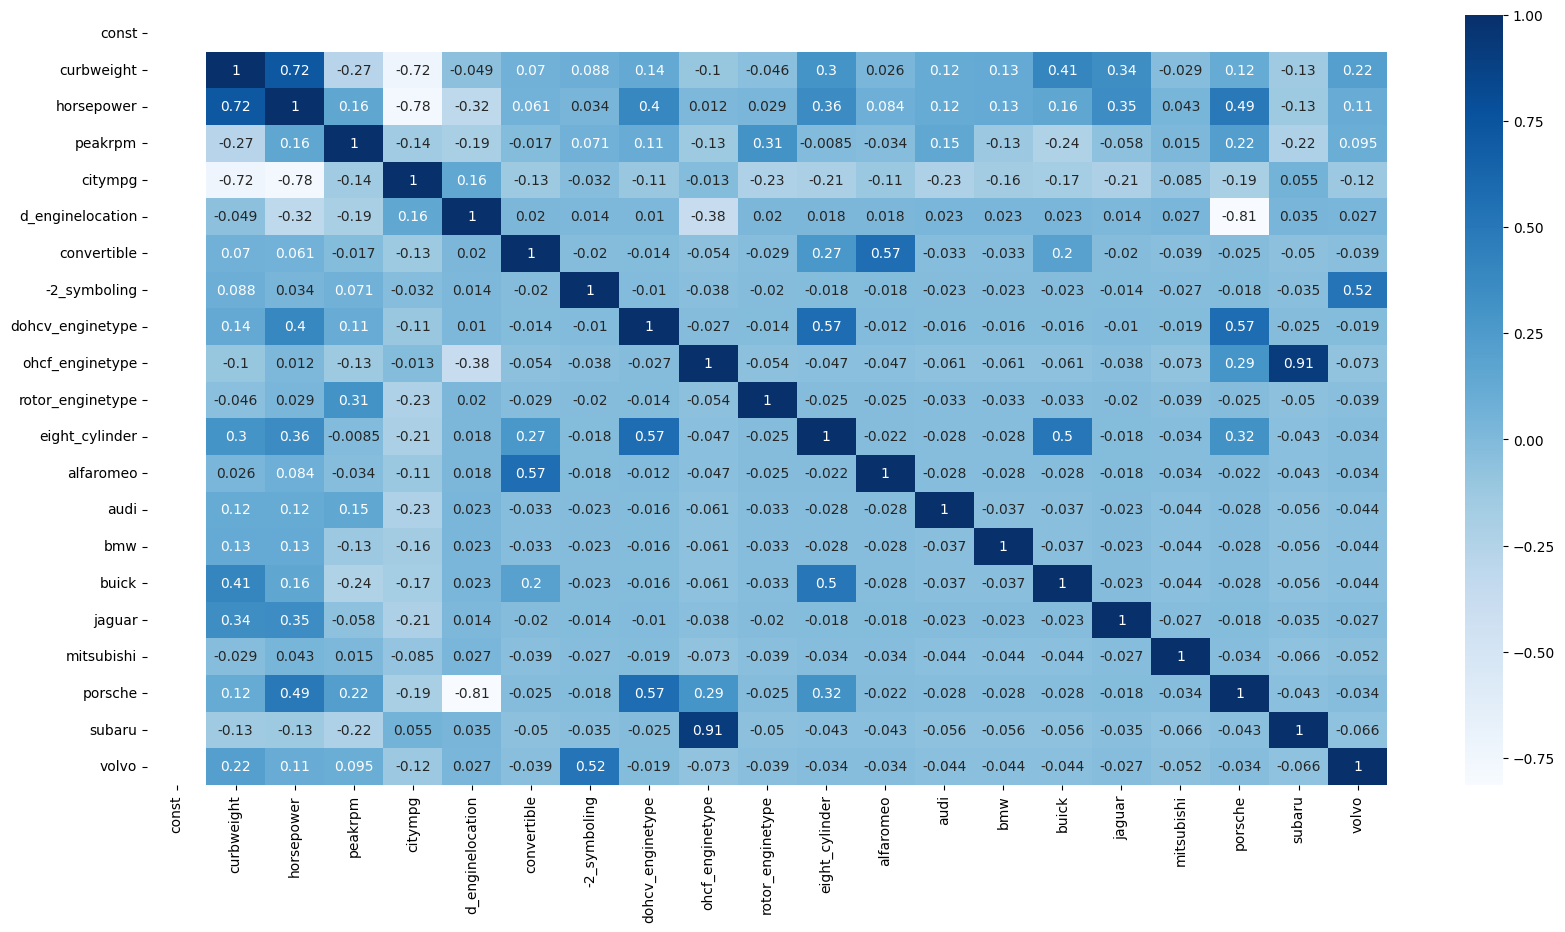

In [115]:
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_1.corr(), annot = True, cmap="Blues")
plt.show()

Per the above heat map, it can be noticed that - subaru and ohcf_enginetype has high positive correlation -> 0.91 - porsche and dohcv_enginetype show a positive correlation -> 0.57 - porsche and d_enginelocation show a high negetive correlation -> -0.81

So let us first remove subaru and see the impact

In [116]:
X_train_without_constant_2 = X_train_without_constant_1.drop(['subaru'], axis = 1)
X_train_2 = X_train_1.drop(['subaru'], axis = 1)


### Model 2 : Rebuilding the model without subaru

In [117]:
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_2)

# Running the linear model

lm2 = sm.OLS(y_train,X_train_lm2).fit() 

#Let's see the summary of our linear model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     148.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.60e-74
Time:                        02:55:35   Log-Likelihood:                 229.03
No. Observations:                 141   AIC:                            -420.1
Df Residuals:                     122   BIC:                            -364.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1247      0.045  

In [118]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
4   d_enginelocation  111.97
1         horsepower    6.53
0         curbweight    6.37
17           porsche    6.03
3            citympg    5.21
7   dohcv_enginetype    3.29
10    eight_cylinder    2.84
2            peakrpm    2.33
14             buick    2.08
5        convertible    1.85
11         alfaromeo    1.69
18             volvo    1.62
8    ohcf_enginetype    1.44
15            jaguar    1.44
6       -2_symboling    1.39
9   rotor_enginetype    1.35
12              audi    1.18
13               bmw    1.15
16        mitsubishi    1.11

As per the heat map it was also noticed that there is 81% negative correlation between d_enginelocation and porsche.
Also the VIF value of d_enginelocation is very high which is greater than 5.
Hence removing d_enginelocation as the variable is insignificant

In [119]:
X_train_without_constant_3 = X_train_without_constant_2.drop(['d_enginelocation'], axis = 1)
X_train_3 = X_train_2.drop(['d_enginelocation'], axis = 1)

### Model 3 : Rebuilding the model without d_enginelocation

In [120]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_3)

 # Running the linear model
    
lm3 = sm.OLS(y_train,X_train_lm3).fit()  

#Let's see the summary of our linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     148.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.60e-74
Time:                        02:58:18   Log-Likelihood:                 229.03
No. Observations:                 141   AIC:                            -420.1
Df Residuals:                     122   BIC:                            -364.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1634      0.046  

In [121]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         horsepower  18.25
0         curbweight  15.24
2            peakrpm   7.30
3            citympg   5.00
9     eight_cylinder   2.90
6   dohcv_enginetype   2.67
16           porsche   2.34
13             buick   2.09
4        convertible   1.88
10         alfaromeo   1.71
17             volvo   1.65
5       -2_symboling   1.40
14            jaguar   1.36
7    ohcf_enginetype   1.33
8   rotor_enginetype   1.31
11              audi   1.22
12               bmw   1.16
15        mitsubishi   1.11

ohcf_enginetype has a high p-value > 0.05, it is insignificant and hence removing the variable

In [123]:
X_train_without_constant_4 = X_train_without_constant_3.drop(['ohcf_enginetype'], axis = 1)
X_train_4 = X_train_3.drop(["ohcf_enginetype"], axis = 1)

In [124]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_4)

 # Running the linear model
    
lm4 = sm.OLS(y_train,X_train_lm4).fit()  

#Let's see the summary of our linear model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     157.3
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.92e-75
Time:                        03:05:22   Log-Likelihood:                 228.34
No. Observations:                 141   AIC:                            -420.7
Df Residuals:                     123   BIC:                            -367.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1834      0.042  

In [125]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1         horsepower  18.02
0         curbweight  15.24
2            peakrpm   7.11
3            citympg   4.78
8     eight_cylinder   2.90
6   dohcv_enginetype   2.52
15           porsche   2.10
12             buick   2.07
4        convertible   1.88
9          alfaromeo   1.71
16             volvo   1.65
5       -2_symboling   1.40
13            jaguar   1.35
7   rotor_enginetype   1.31
10              audi   1.22
11               bmw   1.15
14        mitsubishi   1.10

horsepower has a high p-value > 0.05 and high VIF, it is insignificant and hence removing the variable

In [126]:
X_train_without_constant_5 = X_train_without_constant_4.drop(['horsepower'], axis = 1)
X_train_5 = X_train_4.drop(["horsepower"], axis = 1)

Model 5 : Rebuilding the model without horsepower

In [127]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_5)

 # Running the linear model
    
lm5 = sm.OLS(y_train,X_train_lm5).fit()  

#Let's see the summary of our linear model

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     137.5
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           9.02e-71
Time:                        03:09:16   Log-Likelihood:                 214.71
No. Observations:                 141   AIC:                            -395.4
Df Residuals:                     124   BIC:                            -345.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1305      0.045  

In [128]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1            peakrpm  4.87
0         curbweight  4.38
2            citympg  3.41
7     eight_cylinder  2.88
5   dohcv_enginetype  2.47
11             buick  2.06
3        convertible  1.86
14           porsche  1.70
8          alfaromeo  1.66
15             volvo  1.64
4       -2_symboling  1.40
6   rotor_enginetype  1.28
12            jaguar  1.24
9               audi  1.21
10               bmw  1.12
13        mitsubishi  1.09

curbweight has high p value and high VIF. it is insignificant and hence removing the variable

In [129]:
X_train_without_constant_6 = X_train_without_constant_5.drop(['curbweight'], axis = 1)
X_train_6 = X_train_5.drop(["curbweight"], axis = 1)

## Model 6 : Rebuilding the model without curbweight

In [130]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_6)

 # Running the linear model
    
lm6 = sm.OLS(y_train,X_train_lm6).fit()  

#Let's see the summary of our linear model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     58.66
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           4.15e-49
Time:                        03:11:43   Log-Likelihood:                 155.04
No. Observations:                 141   AIC:                            -278.1
Df Residuals:                     125   BIC:                            -230.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3953      0.028  

In [131]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0            peakrpm  4.24
1            citympg  3.08
6     eight_cylinder  2.88
4   dohcv_enginetype  2.47
2        convertible  1.86
10             buick  1.69
13           porsche  1.68
7          alfaromeo  1.62
14             volvo  1.51
3       -2_symboling  1.40
5   rotor_enginetype  1.28
8               audi  1.16
12        mitsubishi  1.07
9                bmw  1.02
11            jaguar  1.02

peakrpm has high p value and VIF, it is insignificant and hence removing the variable

In [133]:
X_train_without_constant_7 = X_train_without_constant_6.drop(['peakrpm'], axis = 1)
X_train_7 = X_train_6.drop(["peakrpm"], axis = 1)

### Model 7 : Rebuilding the model without four_cylinder

In [134]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_7)

 # Running the linear model
    
lm7 = sm.OLS(y_train,X_train_lm7).fit()  

#Let's see the summary of our linear model

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     60.08
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           9.06e-49
Time:                        03:14:09   Log-Likelihood:                 151.78
No. Observations:                 141   AIC:                            -273.6
Df Residuals:                     126   BIC:                            -229.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3542      0.023  

In [135]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5     eight_cylinder  2.86
3   dohcv_enginetype  2.45
1        convertible  1.85
9              buick  1.68
6          alfaromeo  1.62
12           porsche  1.50
13             volvo  1.42
2       -2_symboling  1.40
0            citympg  1.09
11        mitsubishi  1.03
8                bmw  1.01
4   rotor_enginetype  1.00
7               audi  1.00
10            jaguar  1.00

convertible has high p value nad VIF, so it is infigificant and dropping it

In [137]:
X_train_without_constant_8 = X_train_without_constant_7.drop(['convertible'], axis = 1)
X_train_8 = X_train_7.drop(["convertible"], axis = 1)

### Model 8 : Rebuilding the model without ohcv_enginetype

In [138]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm8 = sm.add_constant(X_train_8)

 # Running the linear model
    
lm8 = sm.OLS(y_train,X_train_lm8).fit()  

#Let's see the summary of our linear model

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     65.22
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.10e-49
Time:                        03:16:46   Log-Likelihood:                 151.78
No. Observations:                 141   AIC:                            -275.6
Df Residuals:                     127   BIC:                            -234.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3542      0.023  

In [139]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4     eight_cylinder  2.50
2   dohcv_enginetype  2.33
8              buick  1.68
11           porsche  1.50
12             volvo  1.42
1       -2_symboling  1.40
0            citympg  1.09
10        mitsubishi  1.03
5          alfaromeo  1.01
7                bmw  1.01
3   rotor_enginetype  1.00
6               audi  1.00
9             jaguar  1.00

eight_cylinder has high p value and high VIF, it is insignificant and hence removing the variable

In [140]:
X_train_without_constant_9 = X_train_without_constant_8.drop(['eight_cylinder'], axis = 1)
X_train_9 = X_train_8.drop(["eight_cylinder"], axis = 1)

### Model 9 : Rebuilding the model without eight_cylinder

In [142]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm9 = sm.add_constant(X_train_9)

 # Running the linear model
    
lm9 = sm.OLS(y_train,X_train_lm9).fit()  

#Let's see the summary of our linear model

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     69.10
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           6.64e-50
Time:                        03:19:42   Log-Likelihood:                 149.93
No. Observations:                 141   AIC:                            -273.9
Df Residuals:                     128   BIC:                            -235.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3585      0.023  

In [143]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2   dohcv_enginetype  1.50
10           porsche  1.50
11             volvo  1.42
1       -2_symboling  1.40
0            citympg  1.09
9         mitsubishi  1.03
4          alfaromeo  1.01
6                bmw  1.01
7              buick  1.01
3   rotor_enginetype  1.00
5               audi  1.00
8             jaguar  1.00

dohcv_enginetype has high p value, it is insignificant and hence removing the variable

In [144]:
X_train_without_constant_10 = X_train_without_constant_9.drop(['dohcv_enginetype'], axis = 1)
X_train_10 = X_train_9.drop(["dohcv_enginetype"], axis = 1)

### Model 10 : Rebuilding the model without dohcv_enginetype

In [145]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm10 = sm.add_constant(X_train_10)

 # Running the linear model
    
lm10 = sm.OLS(y_train,X_train_lm10).fit()  

#Let's see the summary of our linear model

print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     75.76
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           8.64e-51
Time:                        03:23:19   Log-Likelihood:                 149.77
No. Observations:                 141   AIC:                            -275.5
Df Residuals:                     129   BIC:                            -240.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3585      0.023  

In [146]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10             volvo  1.42
1       -2_symboling  1.40
0            citympg  1.09
8         mitsubishi  1.03
3          alfaromeo  1.01
5                bmw  1.01
6              buick  1.01
2   rotor_enginetype  1.00
4               audi  1.00
7             jaguar  1.00
9            porsche  1.00

rotor_enginetype has high p value,  it is insignificant and hence removing the variable

In [147]:
X_train_without_constant_11 = X_train_without_constant_10.drop(['rotor_enginetype'], axis = 1)
X_train_11 = X_train_10.drop(["rotor_enginetype"], axis = 1)

### Model 11 : Rebuilding the model without mitsubishi

In [148]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm11 = sm.add_constant(X_train_11)

 # Running the linear model
lm11 = sm.OLS(y_train,X_train_lm11).fit()  

#Let's see the summary of our linear model
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     82.92
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.86e-51
Time:                        03:25:42   Log-Likelihood:                 148.99
No. Observations:                 141   AIC:                            -276.0
Df Residuals:                     130   BIC:                            -243.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3482      0.021     16.422   

In [149]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9         volvo  1.42
1  -2_symboling  1.40
0       citympg  1.08
7    mitsubishi  1.03
2     alfaromeo  1.01
4           bmw  1.01
5         buick  1.01
3          audi  1.00
6        jaguar  1.00
8       porsche  1.00

alfaromeo has high p value,  it is insignificant and hence removing the variable

In [150]:
X_train_without_constant_12 = X_train_without_constant_11.drop(['alfaromeo'], axis = 1)
X_train_12 = X_train_11.drop(["alfaromeo"], axis = 1)

### Model 12 : Rebuilding the model without alfaromeo

In [151]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm12 = sm.add_constant(X_train_12)

 # Running the linear model
lm12 = sm.OLS(y_train,X_train_lm12).fit()  

#Let's see the summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     91.01
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.74e-52
Time:                        03:30:08   Log-Likelihood:                 147.77
No. Observations:                 141   AIC:                            -275.5
Df Residuals:                     131   BIC:                            -246.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3555      0.021     17.142   

In [152]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_without_constant_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8         volvo  1.42
1  -2_symboling  1.40
0       citympg  1.08
6    mitsubishi  1.03
3           bmw  1.01
4         buick  1.01
2          audi  1.00
5        jaguar  1.00
7       porsche  1.00

Observations :

- The p-values of all independent variables is 0.000 , which is less than 0.05 and hence they seem to be good
- The VIF values of all the variables are < 3, which is also good.
- The R-Squared and adjusted R-Squared values 86.291.6% 85.391.0%, which look good.

The VIF's and p-values are both within the acceptable range. Hence we can finalize on this model # 12 for prediction.

In [153]:
# Print the final columns

X_train_12.columns

Index(['const', 'citympg', '-2_symboling', 'audi', 'bmw', 'buick', 'jaguar',
       'mitsubishi', 'porsche', 'volvo'],
      dtype='object')

In [154]:
# Remove the const variable from the final column

X_train_12 = X_train_12.drop(['const'], axis=1)

In [155]:
# Calculate the VIFs for the new model after removing the const column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8         volvo  1.42
1  -2_symboling  1.40
0       citympg  1.08
6    mitsubishi  1.03
3           bmw  1.01
4         buick  1.01
2          audi  1.00
5        jaguar  1.00
7       porsche  1.00

The VIF values are all the same after dropping the const variable

### Step 6 : Residual Analysis of the train data

In [156]:
y_train_price = lm12.predict(X_train_lm12)

Text(0.5, 0, 'Errors')

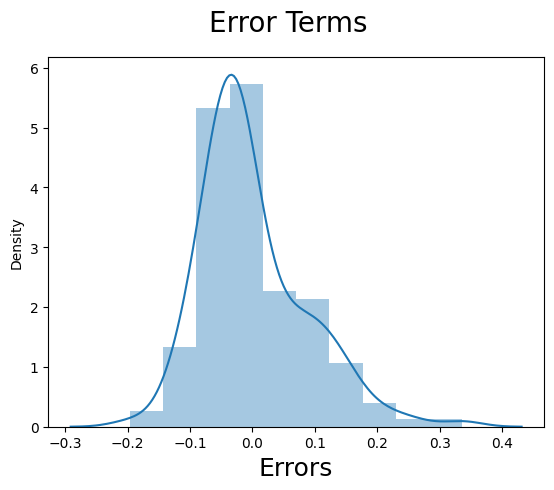

In [157]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

As per the above graph, looks like the residuals are normally distributed around 0.
As for the distribution itself, while for most part the distribution is normal except for the right part towards 0.3, where it is spread out a little bit more.
However, this model is good for predictions as the Adjusted R-Squares is good

### Step 7 : Making predictions using the final model - Model 12

Applying the scaling on the test sets

In [158]:
num_vars =['carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [159]:
df_test.describe()

carheight  curbweight  boreratio     stroke  compressionratio  \
count  61.000000   61.000000  61.000000  61.000000         61.000000   
mean    0.462295    0.398320   0.559251   0.591803          0.170697   
std     0.194678    0.192157   0.190315   0.147778          0.213526   
min     0.133333    0.087277   0.264286   0.057143          0.000000   
25%     0.266667    0.264158   0.435714   0.514286          0.100000   
50%     0.433333    0.354926   0.521429   0.580952          0.125000   
75%     0.616667    0.557797   0.742857   0.661905          0.150000   
max     1.000000    1.000000   1.000000   1.000000          1.000000   

       horsepower    peakrpm    citympg      price  d_fueltype  ...  \
count   61.000000  61.000000  61.000000  61.000000   61.000000  ...   
mean     0.230328   0.417531   0.377049   0.232683    0.934426  ...   
std      0.153193   0.181184   0.200598   0.221210    0.249590  ...   
min      0.016667   0.020408   0.058824   0.008532    0.000000  ...   
25%      0.091667   0.265306   0.205882   0.082489    1.000000  ...   
50%      0.204167   0.428571   0.323529   0.142340    1.000000  ...   
75%      0.283333   0.551020   0.529412   0.364492    1.000000  ...   
max      0.662500   1.000000   1.058824   1.004660    1.000000  ...   

          nissan    peugeot   plymouth    porsche    renault       saab  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.081967   0.032787   0.081967   0.032787   0.032787   0.016393   
std     0.276591   0.179556   0.276591   0.179556   0.179556   0.128037   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          subaru     toyota  volkswagen      volvo  
count  61.000000  61.000000   61.000000  61.000000  
mean    0.016393   0.229508    0.032787   0.065574  
std     0.128037   0.424006    0.179556   0.249590  
min     0.000000   0.000000    0.000000   0.000000  
25%     0.000000   0.000000    0.000000   0.000000  
50%     0.000000   0.000000    0.000000   0.000000  
75%     0.000000   0.000000    0.000000   0.000000  
max     1.000000   1.000000    1.000000   1.000000  

[8 rows x 23 columns]

## Dividing into X_test and y_test

In [160]:
y_test = df_test.pop('price')
X_test = df_test

In [161]:
# Now let's use our model to make predictions.

# Creating X_test_lm11 dataframe by taking only the variables that exist in the final train model - X_train_11

X_test_lm12 = X_test[X_train_12.columns]

# Adding a constant variable 

X_test_lm12 = sm.add_constant(X_test_lm12)

In [162]:
# Making predictions unsing the eleventh model

y_pred_lm12 = lm12.predict(X_test_lm12)

## Step 8 : Model Evaluation

Text(0, 0.5, 'price_prediction')

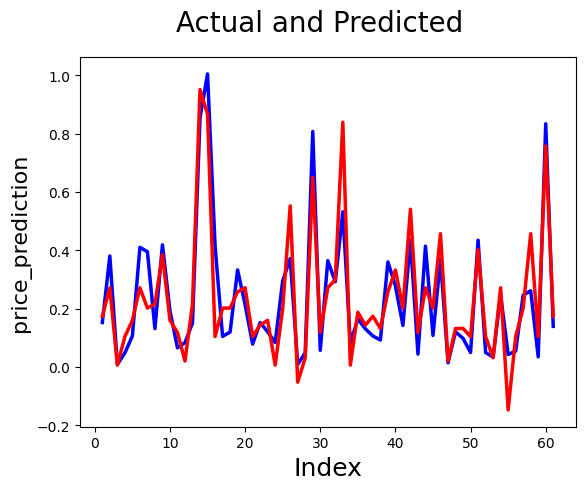

In [163]:
# Actual vs Predicted
# Actual = Blue
# Predicted = Red

c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_lm12, color="red",  linewidth=2.5, linestyle="-")

# Plot heading 
fig.suptitle('Actual and Predicted', fontsize=20)         

# X-label
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('price_prediction', fontsize=16) 

Text(0, 0.5, 'y_test-y_pred_lm11')

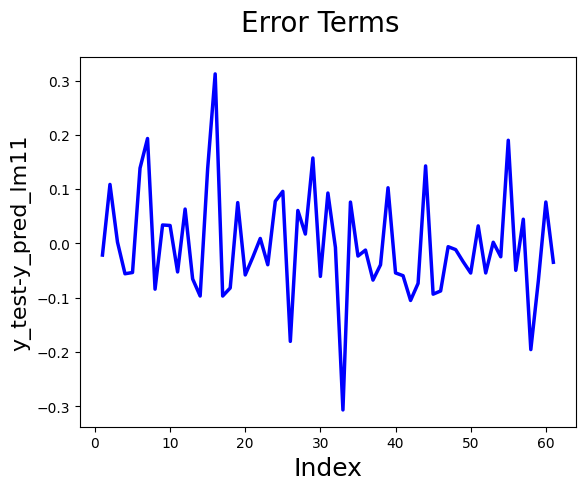

In [164]:
# Error terms

c = [i for i in range(1,62,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_lm12, color="blue", linewidth=2.5, linestyle="-")

# Plot heading
fig.suptitle('Error Terms', fontsize=20) 

# X-label
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test-y_pred_lm11', fontsize=16)  

Text(0, 0.5, 'y_pred')

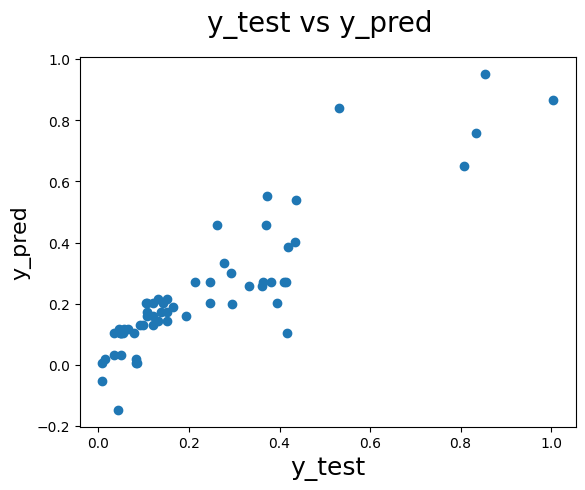

In [165]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lm12)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- The model for the most part is capturing the linear association well.
- There is a very slight variation in the model which can't be explained.
- Overall it looks like a good model

'citympg', '-2_symboling', 'audi', 'bmw', 'buick', 'jaguar',
       'mitsubishi', 'porsche', 'volvo

We can see that the equation of our best fitted line is:
-> price = -0.4747 * citympg - 0.1557 * -2_symboling + 0.1306 * audi + 0.3364 * bmw + 
           0.5277 * buick + 0.6237 * jaguar - 0.0725 * mitsubishi + 0.5673 * porsche + 0.2410 * volvo

The citympg, -2_symboling and mitsubishi have a negative coefficient

### Step 9 : R squared score

In [167]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm12)

0.7908120362463529

### Conclusion :
The model for the most part is capturing the linear association well and overall looks good

The R square and Adjusted R square values in the above Car Price Model for trained data set are almost very close to each other i.e86.2916% 85.3910%0 % respectively. This indicates that none of the parameters in the Car Price Model are reduntant.

Variance Inflation Factor of all variables is < 3.

The R-Squared Score on the test data79.08is 87.7 %, which is a good value.

The following variables are significant for predicting the car prices in US Marcitympg : 1. -2_symbolingg3lsystem 5. Car Make : Buick, Porsche, Jaguar, Volvo, ,mitsubishiAudi, BMW